In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%run model.ipynb
%run utils.ipynb


c:\Users\haZAR\anaconda3\envs\pytorchgpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (relusig): ReluSIG(
        (gelu): GELU(approximate='none')
        (sigmoid): Sigmoid()
      )
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReluSIG(
          (gelu): GELU(approximate='none')
          (sigmoid): Sigmoid()
        )
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReluSIG(
          (gelu): GELU(approximate='none')
          (sigmoid): Sigmoid()
        )
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (relusig): ReluSIG(
        (gelu): GELU(approximate=

In [2]:
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 1
NUM_EPOCHS = 40
NUM_WORKERS = 0
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 240
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR= "im"
TRAIN_MASK_DIR = "ma"
VAL_MASK_DIR = "ma"
VAL_IMG_DIR ="im"
hyp1 = "C:/Users/haZAR/Desktop/Subahnshu_Sethi_ResearchTeam/Segmentation/Model_weights/Hypothises1CONCATskipAND ATTENTION.pth.tar"
hyp2 = "C:/Users/haZAR/Desktop/Subahnshu_Sethi_ResearchTeam/Segmentation/Model_weights/Hypothisesconcatskip_att_gelusig.pth.tar"




In [3]:
"""
    Learning rate scheduler with warmup utility.
"""


class LRWarmup:
    """
    Self-made learning rate scheduler with warmup.
    """

    def __init__(self, epochs, max_lr, k):
        assert k < 0.95 and k > 0.05, "k must be between 0.05 and 0.95" 
        self.epochs = epochs
        self.max_lr = max_lr
        self.max_point = int(k * self.epochs)
        #go to top and come down

    def __call__(self, epoch):
        return self.lr_warmup(epoch)

    def lr_warmup(self, epoch):
        a_1 = self.max_lr / self.max_point
        a_2 = self.max_lr / (self.max_point - self.epochs)

        b = -a_2 * self.epochs
                                            
                                            #llok at this 
        return min(a_1 * epoch, a_2 * epoch + b)

In [4]:

def train_fn(loader, model, optimizer, loss_fn):

    loop = tqdm.tqdm(loader)
    losses = []

    for (data,targets) in (loop):
        data = data.to(device=DEVICE)
        # print("ollllllllllllAA",data.shape)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)
        # print(targets.shape)
        predictions = model(data)

        loss = loss_fn(predictions, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        losses.append(loss.item())
        loop.set_postfix(loss=loss.item())

    return sum(losses) / len(losses)
        



Number of training samples: 60
Number of validation samples: 60
Got 2175754/2304000 with acc 94.43


100%|██████████| 60/60 [00:06<00:00,  9.89it/s, loss=0.814]


Saving checkpoint
Got 2081402/2304000 with acc 90.34


100%|██████████| 60/60 [00:05<00:00, 10.27it/s, loss=0.803]


Saving checkpoint
Got 2046504/2304000 with acc 88.82


100%|██████████| 60/60 [00:05<00:00, 10.43it/s, loss=0.789]


Saving checkpoint
Got 2046037/2304000 with acc 88.80


100%|██████████| 60/60 [00:05<00:00, 10.33it/s, loss=0.845]


Saving checkpoint
Got 2034576/2304000 with acc 88.31


100%|██████████| 60/60 [00:05<00:00, 10.21it/s, loss=0.902]


Saving checkpoint
Got 2042000/2304000 with acc 88.63


100%|██████████| 60/60 [00:05<00:00, 10.23it/s, loss=0.837]


Saving checkpoint
Got 2052862/2304000 with acc 89.10


100%|██████████| 60/60 [00:05<00:00, 10.26it/s, loss=0.85] 


Saving checkpoint
Got 2048254/2304000 with acc 88.90


100%|██████████| 60/60 [00:05<00:00, 10.24it/s, loss=0.699]


Saving checkpoint
Got 2057414/2304000 with acc 89.30


100%|██████████| 60/60 [00:05<00:00, 10.24it/s, loss=0.756]


Saving checkpoint
Got 2037870/2304000 with acc 88.45


100%|██████████| 60/60 [00:05<00:00, 10.33it/s, loss=0.736]


Saving checkpoint
Got 2061892/2304000 with acc 89.49


100%|██████████| 60/60 [00:05<00:00, 10.24it/s, loss=0.921]


Saving checkpoint
Got 2047525/2304000 with acc 88.87


100%|██████████| 60/60 [00:05<00:00, 10.25it/s, loss=0.701]


Saving checkpoint
Got 2070457/2304000 with acc 89.86


100%|██████████| 60/60 [00:05<00:00, 10.26it/s, loss=0.806]


Saving checkpoint
Got 2057938/2304000 with acc 89.32


100%|██████████| 60/60 [00:05<00:00, 10.28it/s, loss=0.926]


Saving checkpoint
Got 2057088/2304000 with acc 89.28


100%|██████████| 60/60 [00:05<00:00, 10.27it/s, loss=0.857]


Saving checkpoint
Got 2054671/2304000 with acc 89.18


100%|██████████| 60/60 [00:05<00:00, 10.27it/s, loss=0.807]


Saving checkpoint
Got 2079848/2304000 with acc 90.27


100%|██████████| 60/60 [00:05<00:00, 10.25it/s, loss=0.797]


Saving checkpoint
Got 2060041/2304000 with acc 89.41


100%|██████████| 60/60 [00:05<00:00, 10.20it/s, loss=0.942]


Saving checkpoint
Got 2076113/2304000 with acc 90.11


100%|██████████| 60/60 [00:05<00:00, 10.12it/s, loss=0.809]


Saving checkpoint
Got 2063728/2304000 with acc 89.57


100%|██████████| 60/60 [00:05<00:00, 10.09it/s, loss=0.807]


Saving checkpoint
Got 2090571/2304000 with acc 90.74


100%|██████████| 60/60 [00:05<00:00, 10.22it/s, loss=0.778]


Saving checkpoint
Got 2093763/2304000 with acc 90.88


100%|██████████| 60/60 [00:05<00:00, 10.05it/s, loss=0.707]


Saving checkpoint
Got 2103341/2304000 with acc 91.29


100%|██████████| 60/60 [00:06<00:00,  9.52it/s, loss=0.777]


Saving checkpoint
Got 2100500/2304000 with acc 91.17


100%|██████████| 60/60 [00:05<00:00, 10.17it/s, loss=0.846]


Saving checkpoint
Got 2097280/2304000 with acc 91.03


100%|██████████| 60/60 [00:05<00:00, 10.15it/s, loss=0.74] 


Saving checkpoint
Got 2106422/2304000 with acc 91.42


100%|██████████| 60/60 [00:05<00:00, 10.25it/s, loss=0.819]


Saving checkpoint
Got 2102197/2304000 with acc 91.24


100%|██████████| 60/60 [00:05<00:00, 10.24it/s, loss=0.737]


Saving checkpoint
Got 2117926/2304000 with acc 91.92


100%|██████████| 60/60 [00:05<00:00, 10.21it/s, loss=0.731]


Saving checkpoint
Got 2118598/2304000 with acc 91.95


100%|██████████| 60/60 [00:05<00:00, 10.19it/s, loss=0.734]


Saving checkpoint
Got 2120926/2304000 with acc 92.05


100%|██████████| 60/60 [00:05<00:00, 10.19it/s, loss=0.772]


Saving checkpoint
Got 2123217/2304000 with acc 92.15


100%|██████████| 60/60 [00:05<00:00, 10.20it/s, loss=0.691]


Saving checkpoint
Got 2127507/2304000 with acc 92.34


100%|██████████| 60/60 [00:05<00:00, 10.21it/s, loss=0.69] 


Saving checkpoint
Got 2131801/2304000 with acc 92.53


100%|██████████| 60/60 [00:05<00:00, 10.21it/s, loss=0.72] 


Saving checkpoint
Got 2129565/2304000 with acc 92.43


100%|██████████| 60/60 [00:05<00:00, 10.23it/s, loss=0.64] 


Saving checkpoint
Got 2133584/2304000 with acc 92.60


100%|██████████| 60/60 [00:05<00:00, 10.22it/s, loss=0.753]


Saving checkpoint
Got 2135894/2304000 with acc 92.70


100%|██████████| 60/60 [00:05<00:00, 10.19it/s, loss=0.763]


Saving checkpoint
Got 2134690/2304000 with acc 92.65


100%|██████████| 60/60 [00:05<00:00, 10.22it/s, loss=0.653]


Saving checkpoint
Got 2136169/2304000 with acc 92.72


100%|██████████| 60/60 [00:05<00:00, 10.22it/s, loss=0.755]


Saving checkpoint
Got 2143138/2304000 with acc 93.02


100%|██████████| 60/60 [00:05<00:00, 10.22it/s, loss=0.734]


Saving checkpoint
Got 2134505/2304000 with acc 92.64


100%|██████████| 60/60 [00:05<00:00, 10.23it/s, loss=0.695]


Saving checkpoint
Got 2138144/2304000 with acc 92.80


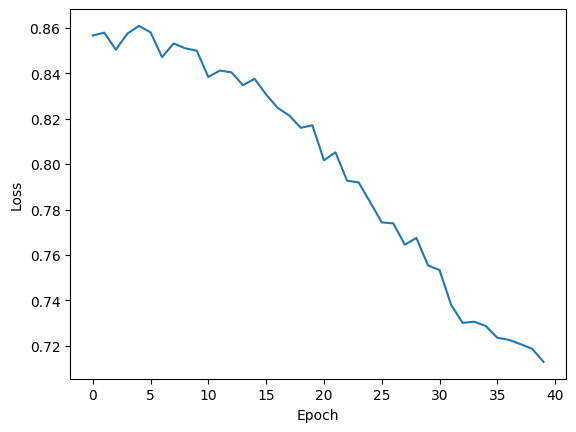

In [6]:
def main():
    train_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Rotate(limit=35, p=0.05),
            A.HorizontalFlip(p=0.07),
            A.VerticalFlip(p=0.08),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],

    )
    val_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT,width=IMAGE_WIDTH),
            ToTensorV2(),
        ],
        
    )
    model = load_model('UNet').to(device= DEVICE)
    
    loss_fn = nn.BCEWithLogitsLoss()
    # optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    optimizer = torch.optim.AdamW(model.parameters() ,weight_decay=0.02)
    warmup = LRWarmup(epochs=NUM_EPOCHS, max_lr=LEARNING_RATE, k=0.77)
    lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, warmup.lr_warmup)
    train_loader , val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        train_transform,
        val_transform,
        NUM_WORKERS,
        PIN_MEMORY
    )
    # print("olaaaaaaaaaaaaa")

    if LOAD_MODEL == 1:
        load_checkpoint(torch.load(hyp1), model)
    elif LOAD_MODEL == 2 :
        load_checkpoint(torch.load(hyp2), model)
        
    check_accuracy(val_loader,model,loss_fn,device=DEVICE)
    losses = []

    for epochs in range(NUM_EPOCHS):
        model.train()
        loss = train_fn(train_loader, model, optimizer, loss_fn)
        losses.append(loss)
        checkpoint = {
            "state_dict":model.state_dict(),
            "optimizer":optimizer.state_dict(),
        }

        save_checkpoint(checkpoint)

        check_accuracy(val_loader,model,loss_fn,device = DEVICE)

        save_predictions_as_imgs(
            val_loader,model,folder = "saved_images/" ,device = DEVICE

        )
        lr_scheduler.step()
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
        
if __name__ == "__main__":
    main()



    

In [8]:
pth = "my_checkpoint_scheduler.pth.tar"

In [18]:

def train_fn(loader, model, optimizer, loss_fn):

    loop = tqdm.tqdm(loader)
    losses = []

    for (data,targets) in (loop):
        data = data.to(device=DEVICE)
        print("ollllllllllllAA",data.shape)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)
        # print(targets.shape)
        predictions = model(data)

        loss = loss_fn(predictions, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        losses.append(loss.item())
        loop.set_postfix(loss=loss.item())

    return sum(losses) / len(losses)
        



In [9]:
model = load_model('UNet').to(device= DEVICE)
load_checkpoint(torch.load(pth),model)

loading checkpoint


In [10]:
model.eval()

UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (relusig): ReluSIG(
        (gelu): GELU(approximate='none')
        (sigmoid): Sigmoid()
      )
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReluSIG(
          (gelu): GELU(approximate='none')
          (sigmoid): Sigmoid()
        )
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReluSIG(
          (gelu): GELU(approximate='none')
          (sigmoid): Sigmoid()
        )
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (relusig): ReluSIG(
        (gelu): GELU(approximate=

In [11]:
val_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT,width=IMAGE_WIDTH),
            ToTensorV2(),
        ],
        
    )

In [12]:
import numpy as np
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Resize the image to match the model input size if necessary
    transforms.ToTensor(),          # Convert the image to a tensor
])

In [28]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
  
    image = transform(image)
    image = image.unsqueeze(0)  
    return image
     

In [29]:
img_path = "im/000142.png"
image = preprocess_image(img_path)

In [79]:
C:/Users/haZAR/Desktop/Subahnshu_Sethi_ResearchTeam/Segmentation

torch.Size([1, 1, 160, 160])

In [24]:
def predict(model,image):
    image = preprocess_image(image)
    with torch.no_grad():
            preds = torch.sigmoid(model(image))
            preds = (preds > 0.5).float()
    torchvision.utils.save_image(
          preds, f"{"C:/Users/haZAR/Desktop/Subahnshu_Sethi_ResearchTeam/Segmentation"}/pred.png"
          )

In [30]:
predict(model,img_path)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [35]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Resize the image to match the model input size if necessary
    transforms.ToTensor(),          # Convert the image to a tensor
])

# Preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert image to grayscale
    image = transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension
    return image.float()

# Predict function
def predict(model, image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        preds = model(image)
    
    # Remove batch dimension and channel dimension
    preds = preds.squeeze(0).squeeze(0)

    print(f'Prediction shape: {preds.shape}')
    print(f'Prediction min value: {preds.min()}')
    print(f'Prediction max value: {preds.max()}')

    # Display the original image and the segmentation mask
    original_image = Image.open(image_path).convert('RGB')
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preds, cmap='gray', vmin=0, vmax=1)  # Normalize between 0 and 1
    plt.title('Segmentation Mask')
    
    plt.show()

# Example usage (assuming you have a model defined):
# model = ...  # Your model here
# predict(model, 'path_to_image.jpg')


In [36]:
predict(model,img_path)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [33]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define the transformation to preprocess the image
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Resize the image to match the model input size if necessary
    transforms.ToTensor(),          # Convert the image to a tensor
])

def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert image to grayscale
    image = transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension
    return image.float()

def predict_and_plot(model, image_path, device='cuda'):
    # Set model to evaluation mode
    model.eval()
    
    # Preprocess the image
    image = preprocess_image(image_path)
    image = image.to(device)

    # Perform prediction
    with torch.no_grad():
        preds = torch.sigmoid(model(image))
        preds = preds.squeeze(0).cpu()  # Remove batch dimension and move to CPU

    # Plot the original image and the predicted heatmap
    original_image = Image.open(image_path).convert('L')
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    
    ax[1].imshow(original_image, cmap='gray')
    ax[1].imshow(preds[0], cmap='hot', alpha=0.5)  # Overlay predicted heatmap
    ax[1].set_title('Predicted Heatmap Overlay')
    
    plt.show()

# Example usage
# model = ...  # Your trained model
# image_path = 'path_to_your_image.png'
# predict_and_plot(model, image_path, device='cuda')


In [34]:
def predict(model, image):
    with torch.no_grad():
        preds = torch.sigmoid(model(image))
    preds = preds.squeeze(0)

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(preds)
    plt.title('Predicted Heatmap Overlay')

    plt.show()


In [21]:
predict(model,img)

NameError: name 'img' is not defined